# ***Data Collection***
* Data Collection is an essential part of exploratory data analysis. It refers to
the process of finding and loading data into our system. Good, reliable data can be found on various public sites or bought from private organizations. Some reliable sites for data collection are Kaggle, Github, Machine Learning Repository, etc.

* The data depicted below represents life expectancy dataset that is available on Kaggle. It contains 183 country information and many factors that could affect the life expectancy.




In [41]:
import numpy as np
import plotly.express as px
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [42]:
df = pd.read_csv('life_expectancy.csv')

In [43]:
df.sample(frac = 0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
100,Armenia,2011,Developing,73.9000,128.0000,1,4.0900,260.9964,95.0000,0,...,96.0000,3.7100,95.0000,0.1000,3526.9781,2875581.0000,2.0000,2.1000,0.7290,12.7000
1398,Kuwait,2011,Developing,74.2000,85.0000,1,0.0200,2785.0977,99.0000,32,...,99.0000,2.6200,99.0000,0.1000,48268.5912,NaN,3.3000,3.2000,0.7920,13.4000
1597,Malaysia,2004,Developing,73.2000,137.0000,3,0.4900,315.6639,94.0000,5729,...,95.0000,3.7400,95.0000,0.1000,4955.4777,2517419.0000,9.2000,8.9000,0.7310,12.7000
875,Estonia,2006,Developing,73.0000,188.0000,0,16.5800,244.3511,95.0000,27,...,95.0000,5.1000,95.0000,0.1000,12595.4165,134681.0000,2.1000,2.2000,0.8220,16.1000
1411,Kyrgyzstan,2014,Developing,78.0000,17.0000,3,0.0100,0.0000,96.0000,318,...,95.0000,6.4800,96.0000,0.1000,NaN,NaN,3.3000,3.4000,0.6560,12.8000
2479,Suriname,2009,Developing,70.0000,196.0000,0,5.1300,885.0740,87.0000,0,...,85.0000,6.1400,87.0000,0.6000,7443.8518,52619.0000,3.5000,3.4000,0.6960,12.1000
151,Azerbaijan,2008,Developing,73.0000,141.0000,6,1.1800,206.2616,68.0000,5,...,85.0000,4.3700,81.0000,0.1000,5574.6382,87634.0000,2.8000,2.9000,0.7190,11.6000
1837,Netherlands,2007,Developed,82.0000,68.0000,1,9.5300,9689.7328,NaN,10,...,97.0000,9.3600,97.0000,0.1000,51241.3156,16381696.0000,1.0000,1.0000,0.8990,16.6000
1696,Mexico,2002,Developing,75.0000,127.0000,49,4.7700,12.1860,97.0000,0,...,98.0000,5.5200,97.0000,0.1000,716.8219,1435568.0000,1.9000,1.8000,0.7030,11.6000
1864,Nicaragua,2012,Developing,73.9000,157.0000,2,3.6300,334.8174,98.0000,0,...,99.0000,8.4000,98.0000,0.1000,1792.3845,587718.0000,1.8000,1.7000,0.6250,11.5000


### Descriptive statistic


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2928.0000,69.2249,9.5239,36.3000,63.1000,72.1000,75.7000,89.0000
Adult Mortality,2928.0000,164.7964,124.2921,1.0000,74.0000,144.0000,228.0000,723.0000
infant deaths,2938.0000,30.3039,117.9265,0.0000,0.0000,3.0000,22.0000,1800.0000
Alcohol,2744.0000,4.6029,4.0524,0.0100,0.8775,3.7550,7.7025,17.8700
percentage expenditure,2938.0000,738.2513,1987.9149,0.0000,4.6853,64.9129,441.5341,19479.9116
Hepatitis B,2385.0000,80.9405,25.0700,1.0000,77.0000,92.0000,97.0000,99.0000
Measles,2938.0000,2419.5922,11467.2725,0.0000,0.0000,17.0000,360.2500,212183.0000
BMI,2904.0000,38.3212,20.0440,1.0000,19.3000,43.5000,56.2000,87.3000
under-five deaths,2938.0000,42.0357,160.4455,0.0000,0.0000,4.0000,28.0000,2500.0000


In [45]:
# rename the columns
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

##### Numerical variable: dtypes: float64(16), int64(4)
##### Categorical variable: object(2)

# **Univariate Analysis**
In Univariate Analysis, we analyze data of just one variable. A variable in your dataset refers to a single feature/ column. It can be done either with graphical or non-graphical means by finding specific mathematical values in the data. Some visual methods include:

* Histograms: Bar plots in which the frequency of data is represented with rectangle bars.
* Box-plots: Here the information is represented in the form of boxes.

In [47]:
df_categorical = df[['Country', 'Status']]
df_numerical = df[['Year', 'Life expectancy', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles', 'BMI', 'under-five deaths','Polio', 'Total expenditure','Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]

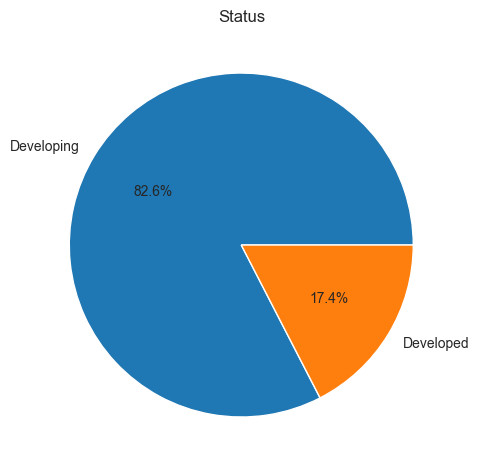

In [48]:
# construct a freq piechart for each categorical data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 8))
x = df['Status'].value_counts().reset_index()
plt.pie(x=x['count'], labels=x['Status'], autopct="%0.1f%%")
plt.title('Status')
plt.tight_layout()
plt.show()

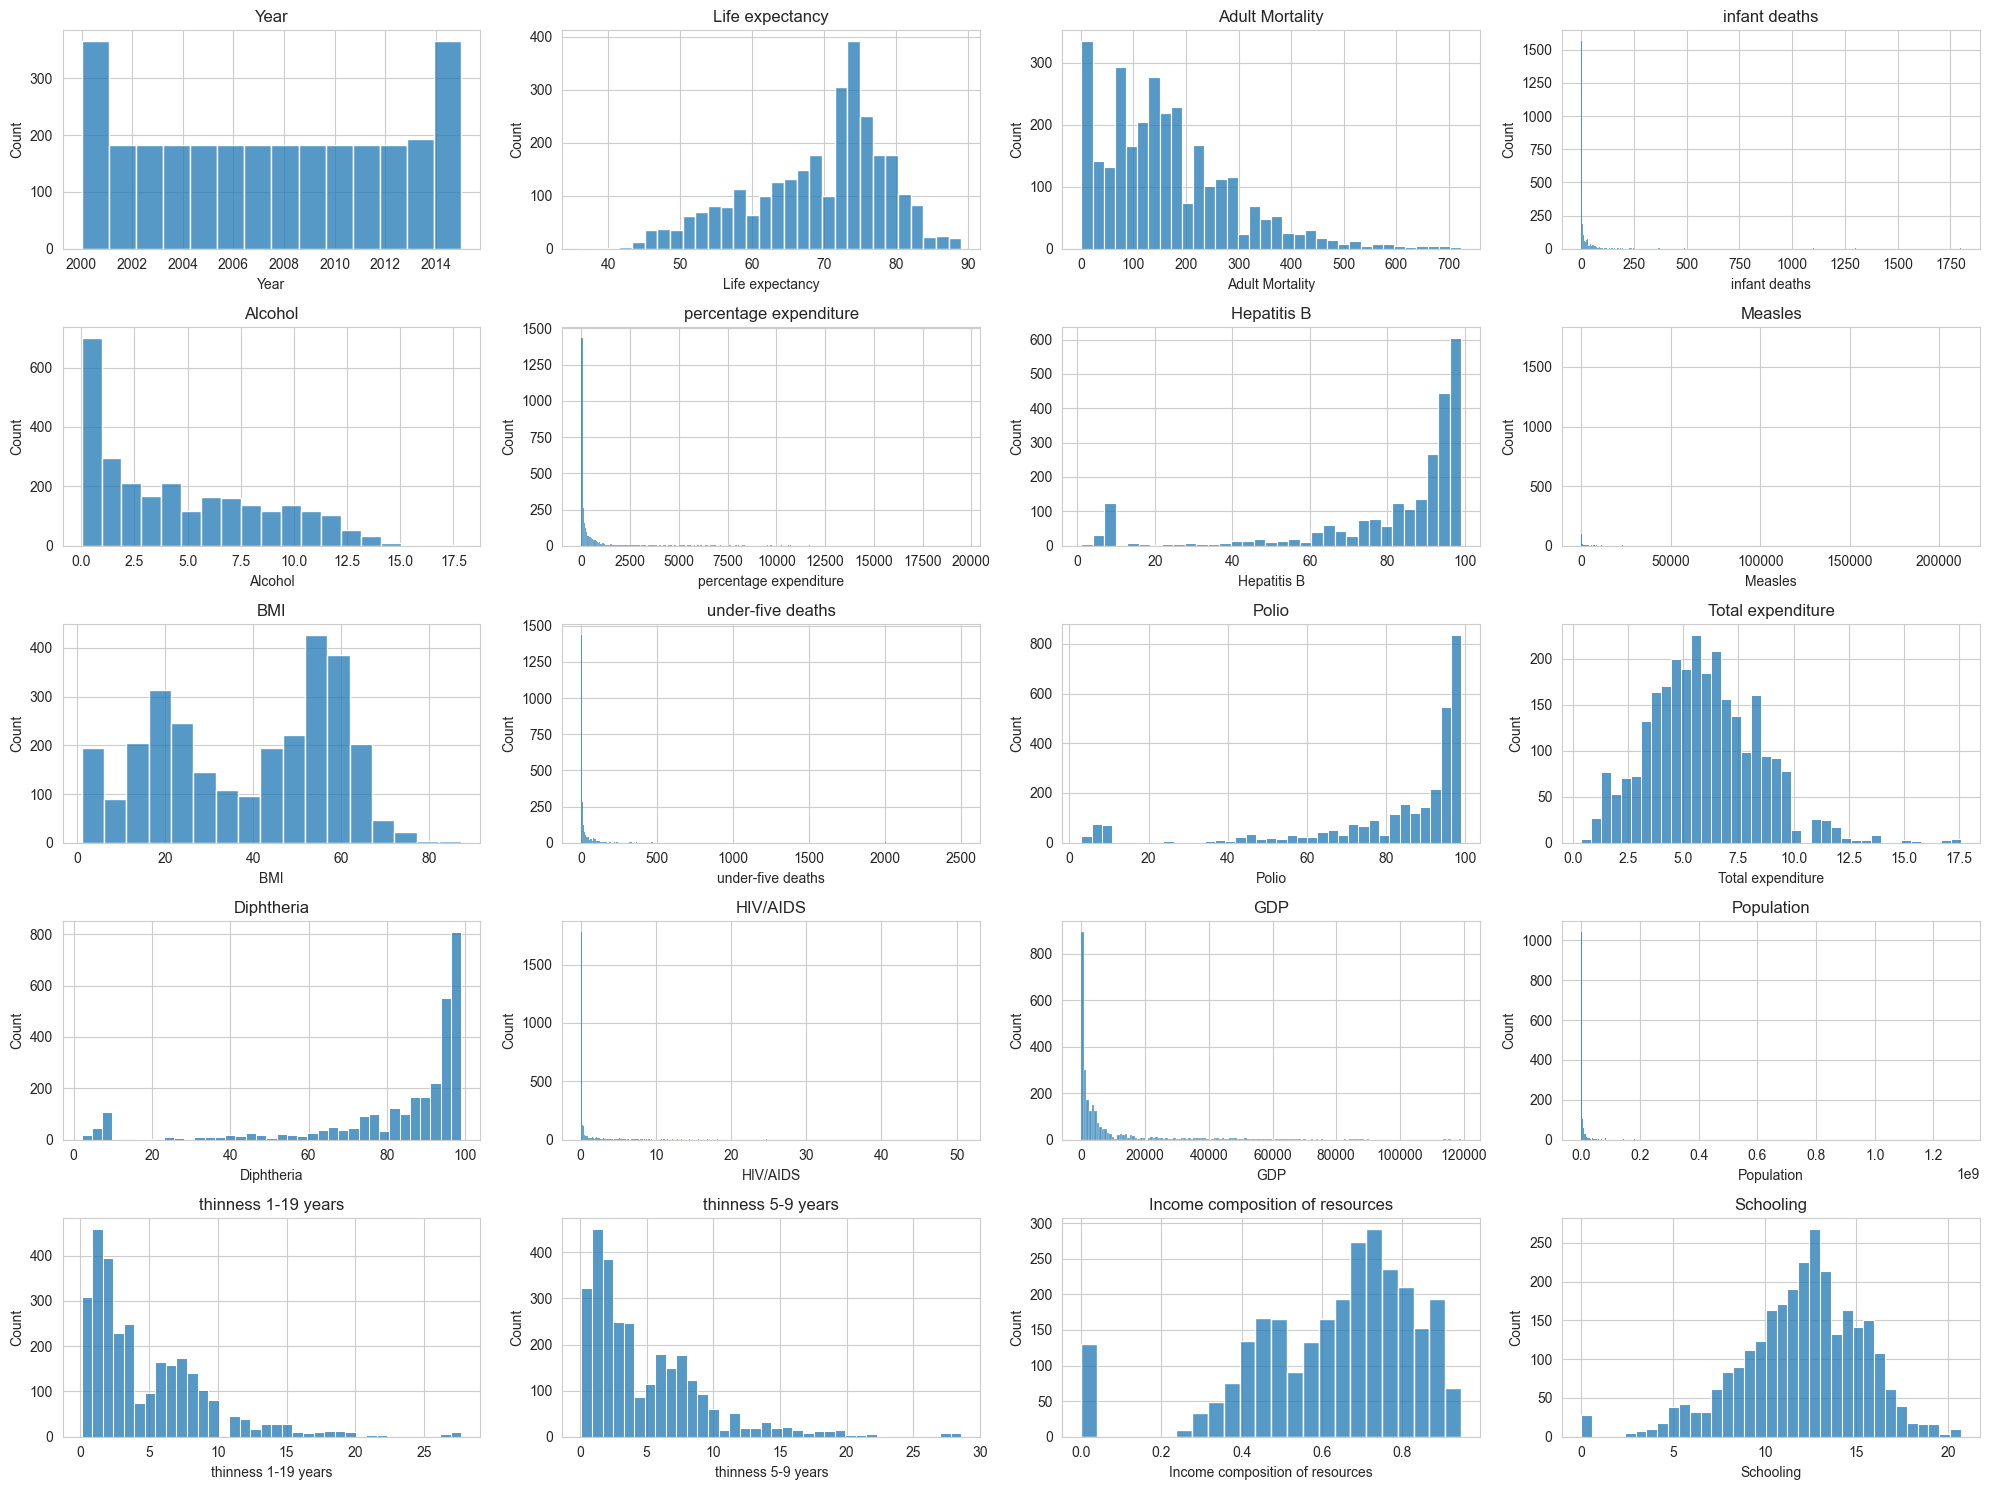

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_numerical.columns):
    plt.subplot(5, 4, i + 1)  # Adjust the number of rows and columns for subplot
    sns.histplot(df_numerical[col], kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


# **Bivariate Analysis**
 Using two variables and compare them. This way, we can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. We can also use boxplots.

### Compare numerical variables with Life Expectancy

#### Target variable: Life expectancy

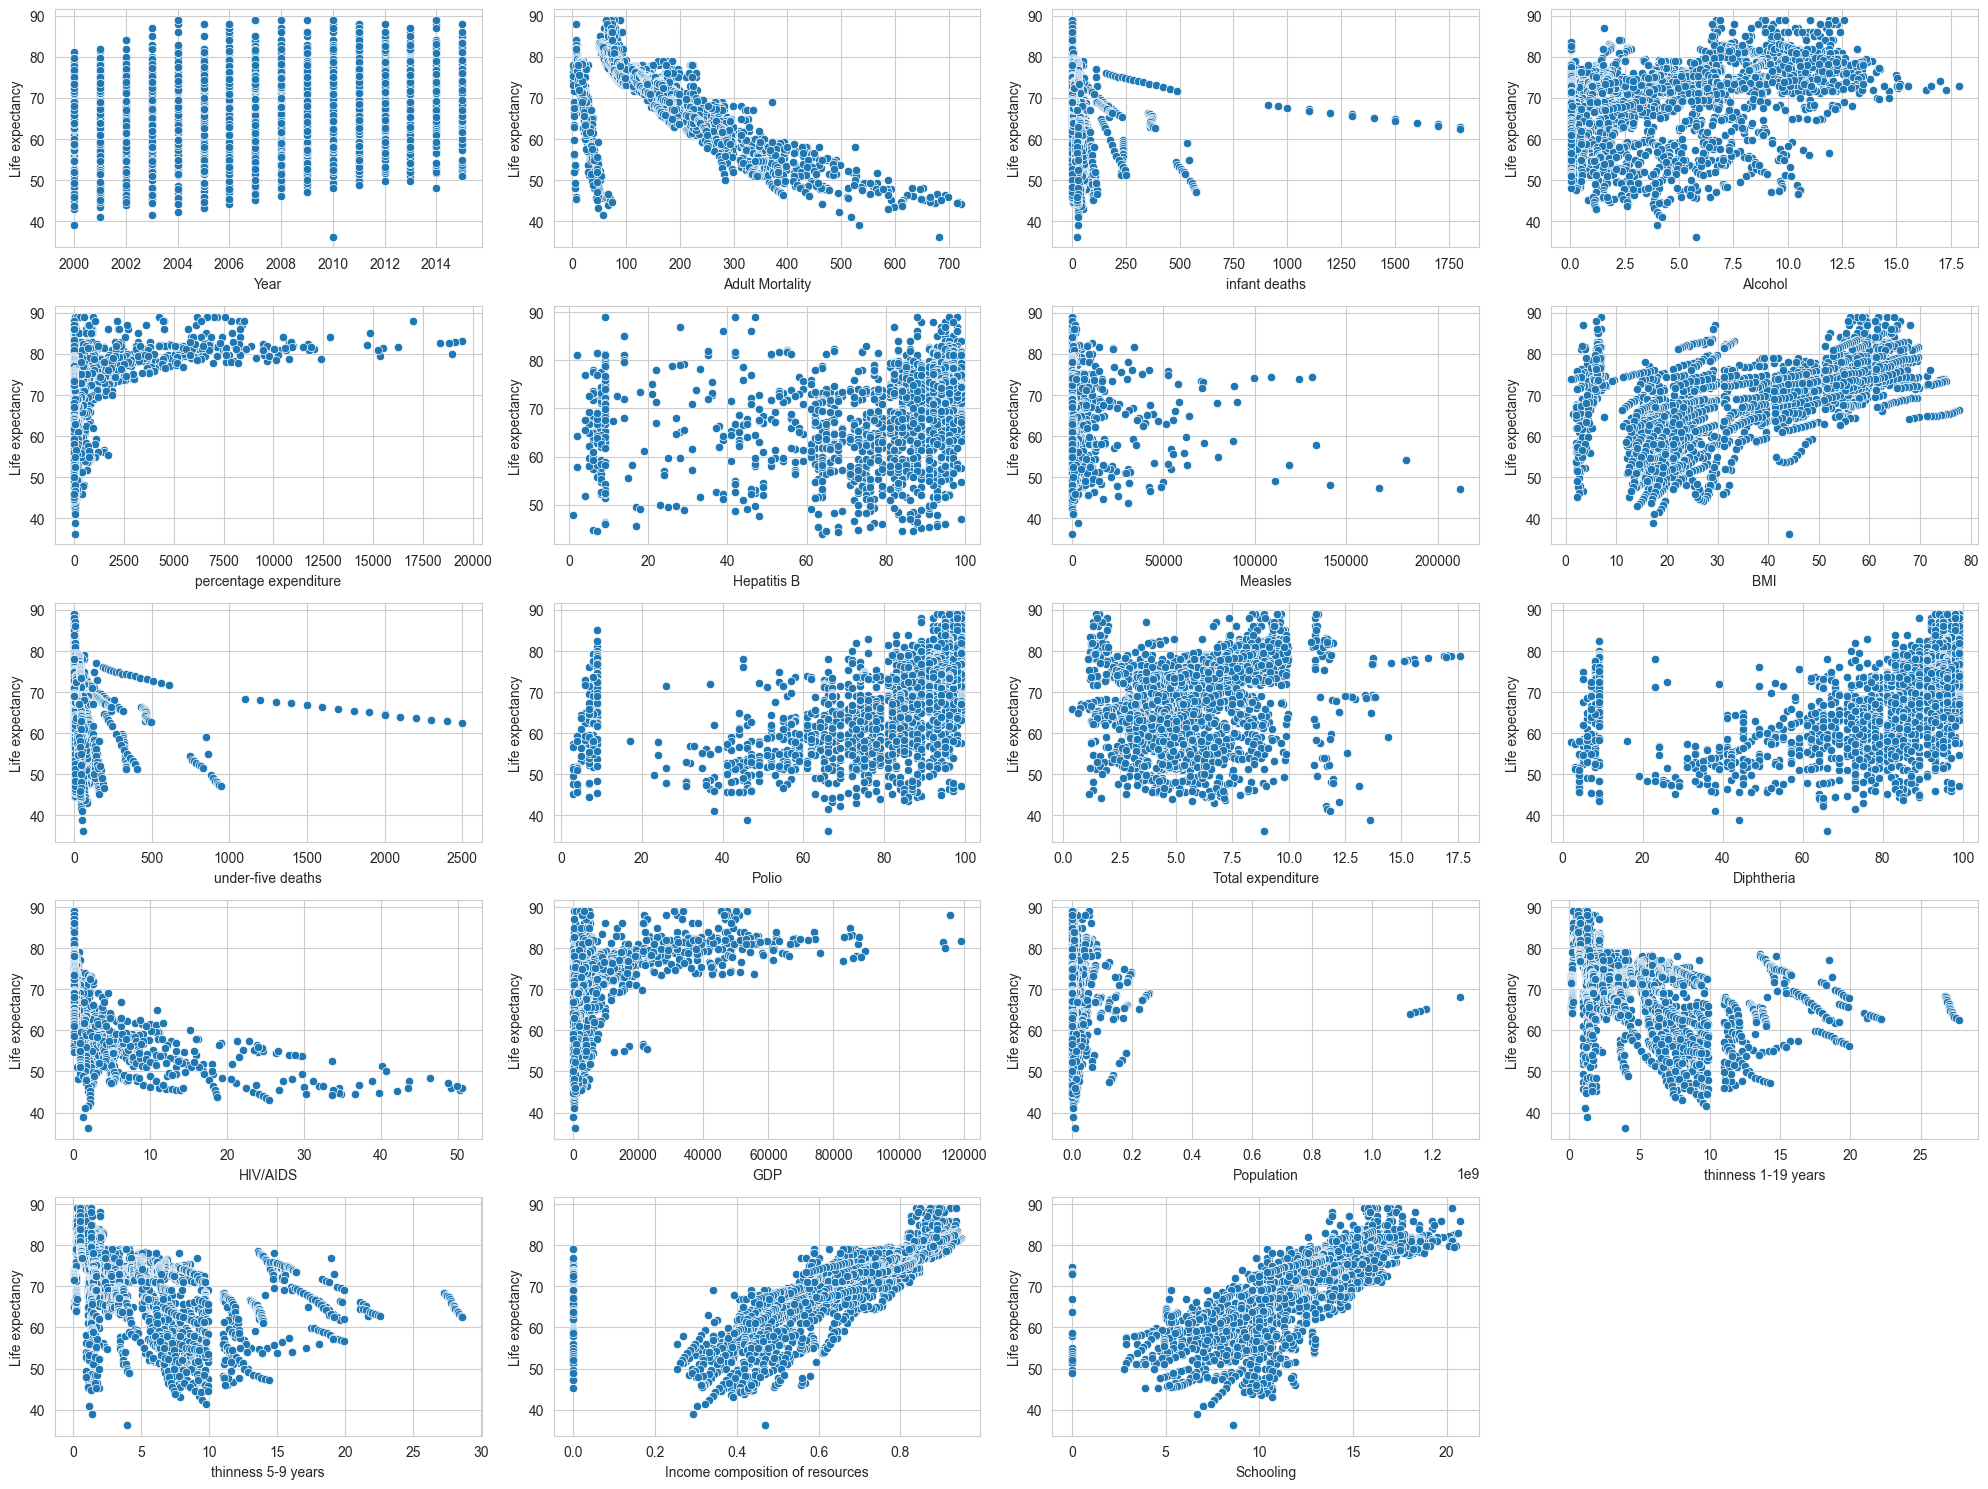

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the number of columns for the subplot grid
num_vars = len(df_numerical.columns) -1   # Subtracting 'Life Expectancy'


# Calculate number of rows and columns for the grid
nrows = int(np.ceil(np.sqrt(num_vars)))
ncols = nrows
plt.figure(figsize=(20, 15))

# Iterate over each column except 'Life Expectancy'
for i, col in enumerate(df_numerical.drop('Life expectancy', axis=1).columns):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data=df_numerical, x=col, y='Life expectancy')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

print(df_numerical.columns)


### Compare categorical variables with Life expectancy

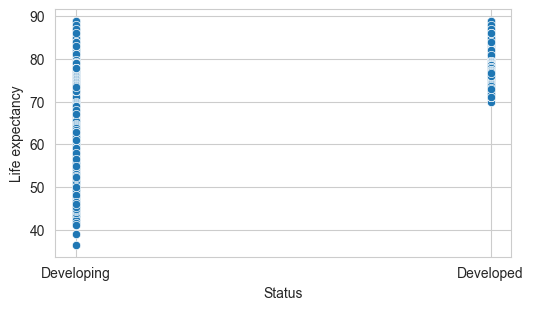

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the number of columns for the subplot grid
cate_vars = len(df_categorical.columns) -1   # Subtracting 'Life Expectancy'


# Calculate number of rows and columns for the grid
nrows = int(np.ceil(np.sqrt(cate_vars)))
ncols = nrows
plt.figure(figsize=(20, 15))

# Iterate over each column except 'Life Expectancy'
for i, col in enumerate(df_categorical.drop('Country', axis=1).columns):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data=df_categorical, x=col, y=df['Life expectancy'])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# **Data Preprocessing**
Data cleaning refers to the process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it. Such anomalies can disproportionately skew the data and hence adversely affect the results. Some steps that can be done to clean data are:





* Removing missing values, outliers, and unnecessary rows/ columns.
* Re-indexing and reformatting our data.

In [52]:
#check to see the number of missing values in each column
df.isna().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [53]:
# Reinformation
df = pd.DataFrame(df)

# Assuming df_main should be a copy of df before interpolation (if needed)
df_main = df.copy()

# Interpolating specific columns
filled_col = df[['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'under-five deaths','Polio', 'Total expenditure','Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']].interpolate()

# Correctly assigning interpolated columns back to df_main
df_main['Life expectancy'] = filled_col['Life expectancy']
df_main['Adult Mortality'] = filled_col['Adult Mortality']
df_main['Alcohol'] = filled_col['Alcohol']
df_main['Hepatitis B'] = filled_col['Hepatitis B']
df_main['BMI'] = filled_col['BMI']
df_main['under-five deaths'] = filled_col['under-five deaths']
df_main['Polio'] = filled_col['Polio']
df_main['Total expenditure'] = filled_col['Total expenditure']
df_main['Diphtheria'] = filled_col['Diphtheria']
df_main['HIV/AIDS'] = filled_col['HIV/AIDS']
df_main['GDP'] = filled_col['GDP']
df_main['Population'] = filled_col['Population']
df_main['thinness 1-19 years'] = filled_col['thinness 1-19 years']
df_main['thinness 5-9 years'] = filled_col['thinness 5-9 years']
df_main['Income composition of resources'] = filled_col['Income composition of resources']
df_main['Schooling'] = filled_col['Schooling']


df_main

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3000,723.0000,27,4.3600,0.0000,68.0000,31,...,67.0000,7.1300,65.0000,33.6000,454.3667,12777511.0000,9.4000,9.4000,0.4070,9.2000
2934,Zimbabwe,2003,Developing,44.5000,715.0000,26,4.0600,0.0000,7.0000,998,...,7.0000,6.5200,68.0000,36.7000,453.3512,12633897.0000,9.8000,9.9000,0.4180,9.5000
2935,Zimbabwe,2002,Developing,44.8000,73.0000,25,4.4300,0.0000,73.0000,304,...,73.0000,6.5300,71.0000,39.8000,57.3483,125525.0000,1.2000,1.3000,0.4270,10.0000
2936,Zimbabwe,2001,Developing,45.3000,686.0000,25,1.7200,0.0000,76.0000,529,...,76.0000,6.1600,75.0000,42.1000,548.5873,12366165.0000,1.6000,1.7000,0.4270,9.8000


### Check descriptive statistical again

In [54]:
df_main.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000
mean,2007.5187,69.2149,164.7446,30.3039,4.5502,738.2513,78.5284,2419.5922,38.2987,42.0357,82.4746,5.9406,82.2461,1.7421,7434.7497,12279536.2311,4.8823,4.9204,0.6344,12.0752
std,4.6138,9.5108,124.2266,117.9265,3.9948,1987.9149,25.1838,11467.2725,19.9914,160.4455,23.4207,2.4457,23.7057,5.0778,13411.0233,54717758.6405,4.4334,4.5325,0.2096,3.3430
min,2000.0000,36.3000,1.0000,0.0000,0.0100,0.0000,1.0000,0.0000,1.0000,0.0000,3.0000,0.3700,2.0000,0.1000,1.6813,34.0000,0.1000,0.1000,0.0000,0.0000
25%,2004.0000,63.1000,74.0000,0.0000,0.9025,4.6853,71.0000,0.0000,19.3250,0.0000,78.0000,4.3125,78.0000,0.1000,553.6186,253409.2647,1.6000,1.6000,0.5000,10.2000
50%,2008.0000,72.0000,144.0000,3.0000,3.7025,64.9129,89.0000,17.0000,43.2500,4.0000,93.0000,5.7550,93.0000,0.1000,2192.6811,1574069.8673,3.4000,3.4000,0.6840,12.4000
75%,2012.0000,75.6000,228.0000,22.0000,7.5500,441.5341,96.0000,360.2500,56.1000,28.0000,97.0000,7.4400,97.0000,0.8000,7188.8759,8207892.5000,7.2000,7.3000,0.7911,14.3000
max,2015.0000,89.0000,723.0000,1800.0000,17.8700,19479.9116,99.0000,212183.0000,87.3000,2500.0000,99.0000,17.6000,99.0000,50.6000,119172.7418,1293859294.0000,27.7000,28.6000,0.9480,20.7000


In [55]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [56]:
df_main.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [57]:
correlations = df_numerical.corr()['Life expectancy'].drop('Life expectancy')

# Filter columns with high correlation
high_corr = correlations[correlations.abs() > 0.5]

# Define the feature set X
X = df_numerical[high_corr.index]

high_corr

Adult Mortality                   -0.6964
BMI                                0.5677
HIV/AIDS                          -0.5566
Income composition of resources    0.7248
Schooling                          0.7520
Name: Life expectancy, dtype: float64

In [58]:
# Define the columns of interest
columns = ['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

# Compute and print the statistics for each column
for column in columns:
    print(f"Statistics for {column}:")

    # Central tendency
    mean = df_main[column].mean()
    median = df_main[column].median()
    mode = df_main[column].mode()[0]
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

    # Dispersion
    std_dev = df_main[column].std()
    var = df_main[column].var()
    range_val = df_main[column].max() - df_main[column].min()
    print(f"Standard Deviation: {std_dev}, Variance: {var}, Range: {range_val}")

    # Position (using percentiles as an example)
    percentiles = df_main[column].quantile([0.25, 0.5, 0.75])
    print(f"25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}")

    # Outliers (using the IQR method as an example)
    IQR = percentiles[0.75] - percentiles[0.25]
    lower_bound = percentiles[0.25] - 1.5 * IQR
    upper_bound = percentiles[0.75] + 1.5 * IQR
    outliers = df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)][column]
    print(f"Number of Outliers: {outliers.count()}")

    # Five-number summary
    min_val = df_main[column].min()
    max_val = df_main[column].max()
    print(f"Min: {min_val}, 25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}, Max: {max_val}")

    print("\n")

Statistics for Adult Mortality:
Mean: 164.74455411844792, Median: 144.0, Mode: 12.0
Standard Deviation: 124.22659620187598, Variance: 15432.247203903948, Range: 722.0
25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0
Number of Outliers: 82
Min: 1.0, 25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0, Max: 723.0


Statistics for BMI:
Mean: 38.29868958475153, Median: 43.25, Mode: 58.5
Standard Deviation: 19.991400395724085, Variance: 399.65608978215704, Range: 86.3
25th percentile: 19.325, Median: 43.25, 75th percentile: 56.1
Number of Outliers: 0
Min: 1.0, 25th percentile: 19.325, Median: 43.25, 75th percentile: 56.1, Max: 87.3


Statistics for HIV/AIDS:
Mean: 1.7421034717494894, Median: 0.1, Mode: 0.1
Standard Deviation: 5.077784531086549, Variance: 25.783895744141844, Range: 50.5
25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8
Number of Outliers: 542
Min: 0.1, 25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8, Max: 50.6


Statistics for Income compos

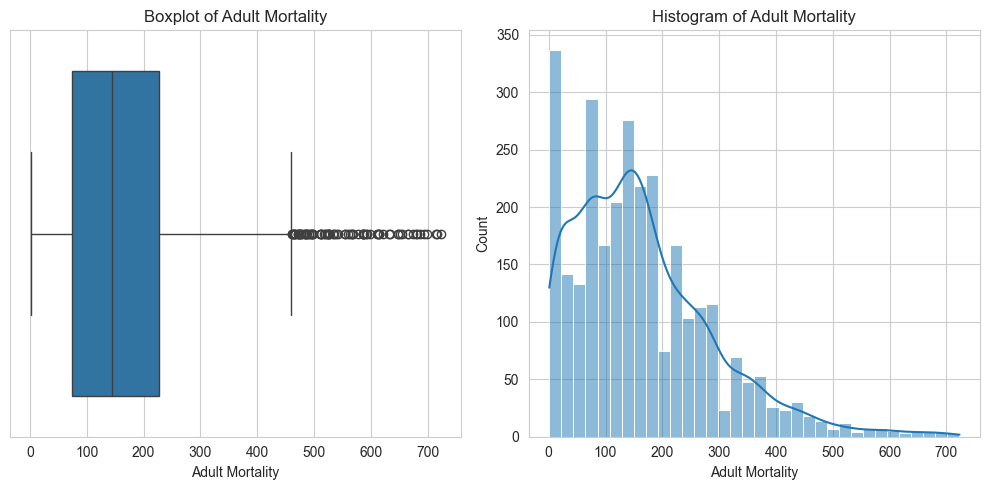

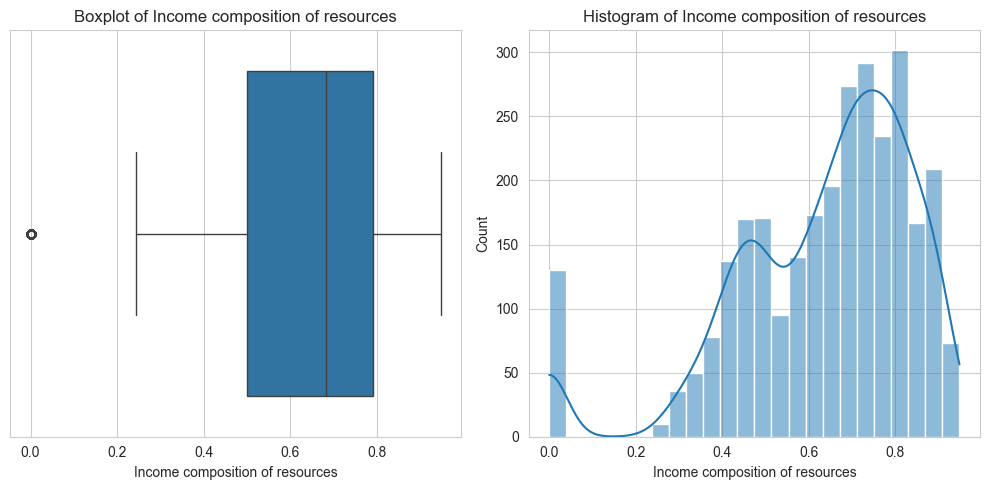

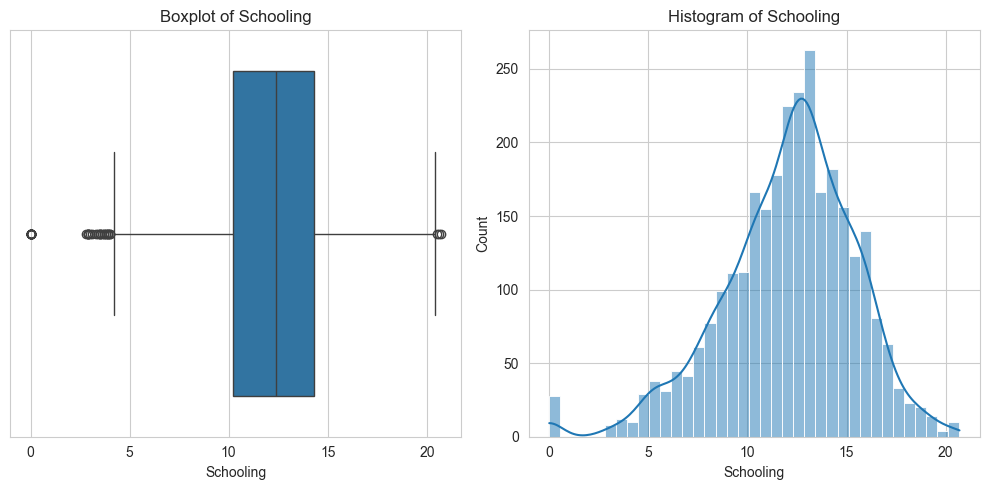

In [59]:
for column in  ['Adult Mortality',  'Income composition of resources', 'Schooling']:

   
    plt.figure(figsize=(10, 5))

    # Create a subplot for the boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_main[column])
    plt.title(f"Boxplot of {column}")

    # Create a subplot for the histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df_main[column], kde=True)
    plt.title(f"Histogram of {column}")

    # Display the plots
    plt.tight_layout()
    plt.show()


### Schooling is quiet good, but Adults Mortality is right skewed, and the Income composition of resources is left skewed. We need to normalize the data to make it more normally distributed.

In [60]:
df_main.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

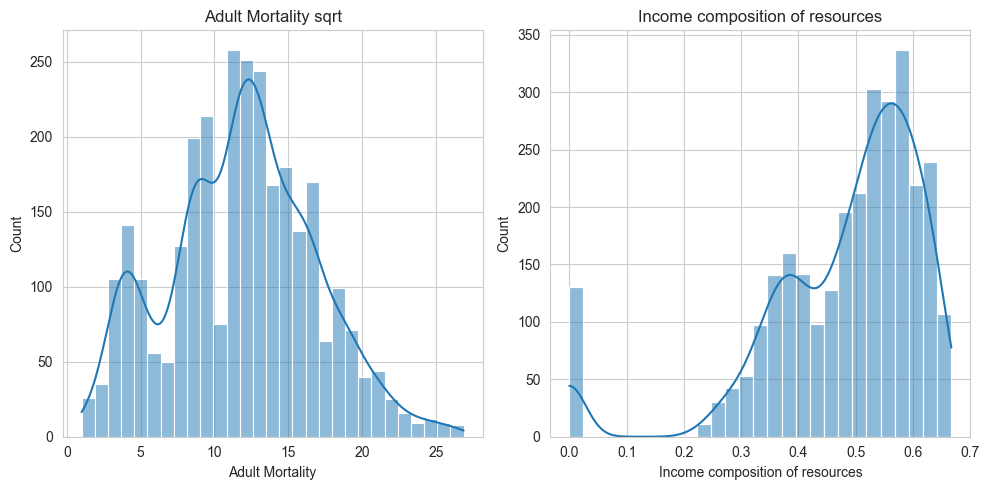

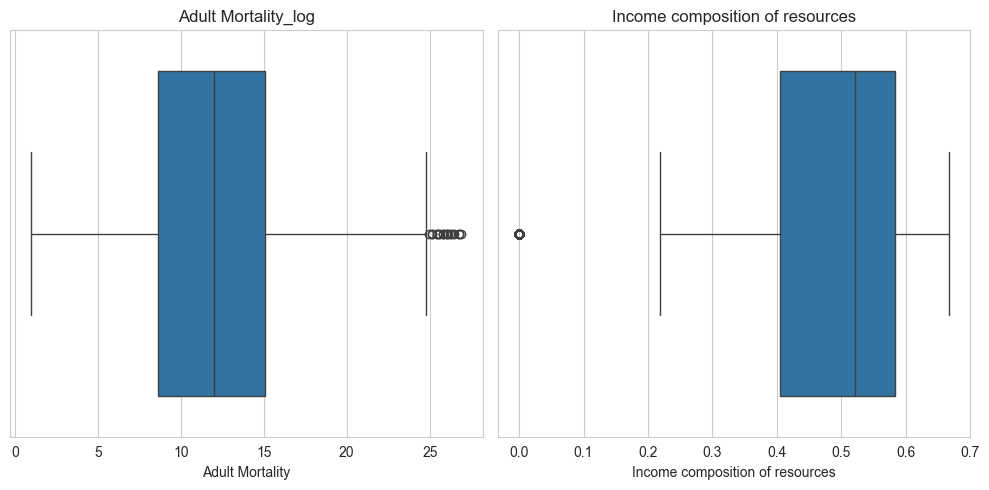

In [61]:
# transform log for the column
df_main['Adult Mortality'] = np.sqrt(df_main['Adult Mortality'])
df_main['Income composition of resources'] = np.log1p(df_main['Income composition of resources'])

# plot histogram for the transformed columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_main['Adult Mortality'], kde=True)
plt.title('Adult Mortality sqrt')
plt.subplot(1, 2, 2)
sns.histplot(df_main['Income composition of resources'], kde=True)
plt.title('Income composition of resources')
plt.tight_layout()
plt.show();
# plot boxplot for the transformed columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_main['Adult Mortality'])
plt.title('Adult Mortality_log')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_main['Income composition of resources'])
plt.title('Income composition of resources')
plt.tight_layout()
plt.show();

In [62]:
# count the number of outliers in the transformed columns using the IQR method
def count_outliers(column):
    Q1 = df_main[column].quantile(0.25)
    Q3 = df_main[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)][column].count()

print(f"Number of outliers in Adult Mortality_sqrt: {count_outliers('Adult Mortality')}")
print(f"Number of outliers in Income composition of resources_log: {count_outliers('Income composition of resources')}")


Number of outliers in Adult Mortality_sqrt: 18
Number of outliers in Income composition of resources_log: 130


### After transforming the data, we can see that the outlier impact has been reduced. Schooling variable is maintained, while Adult Mortality and Income composition of resources are transformed to reduce outliers impacts and to build better OLS regression. Thus,we choose School, square root of Adult Mortality, and log of Income composition of resources as our independent variables.

# **Univariate Analysis**
In Univariate Analysis, we analyze data of just one variable. A variable in your dataset refers to a single feature/ column. It can be done either with graphical or non-graphical means by finding specific mathematical values in the data. Some visual methods include:

* Histograms: Bar plots in which the frequency of data is represented with rectangle bars.
* Box-plots: Here the information is represented in the form of boxes.

In [63]:
freq_table = pd.pivot_table(df_main, index='Year', columns= 'Status', aggfunc='size')
print(freq_table)

Status  Developed  Developing
Year                         
2000           32         151
2001           32         151
2002           32         151
2003           32         151
2004           32         151
2005           32         151
2006           32         151
2007           32         151
2008           32         151
2009           32         151
2010           32         151
2011           32         151
2012           32         151
2013           32         161
2014           32         151
2015           32         151


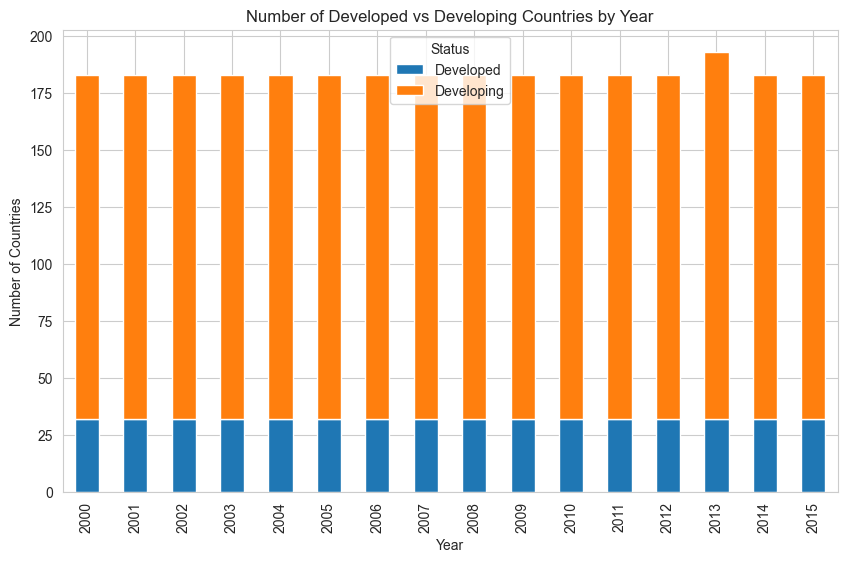

In [64]:
import matplotlib.pyplot as plt

# Plotting
freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Developed vs Developing Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Status')
plt.show()


Frequency Table:
Status
Developing    2426
Developed      512
Name: count, dtype: int64


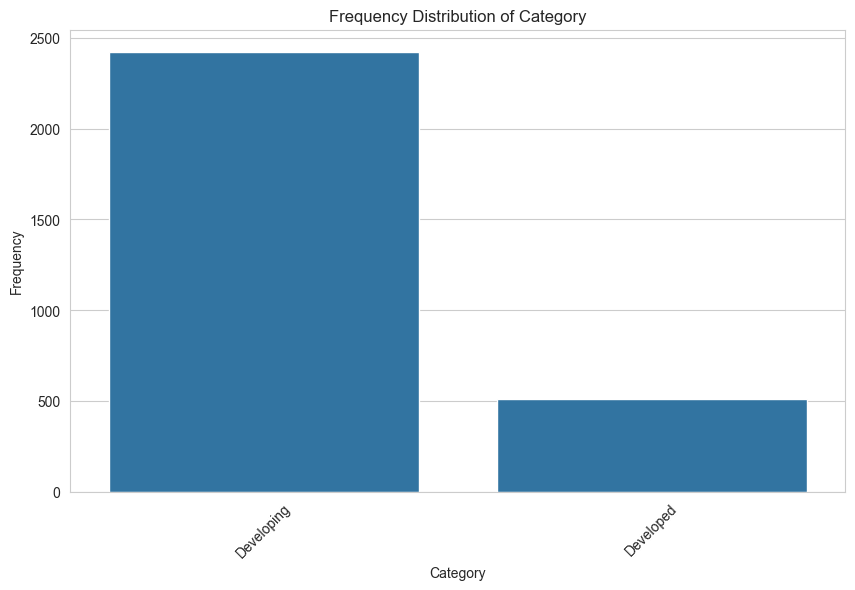

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
# Assuming df is your DataFrame and 'Category' is your categorical column
category_counts = df_main['Status'].value_counts()

# Print frequency table
print("Frequency Table:")
print(category_counts)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels if they overlap
plt.show()


In [66]:
df_main.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,16.2173,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.3914,10.1000
1,Afghanistan,2014,Developing,59.9000,16.4621,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.3893,10.0000
2,Afghanistan,2013,Developing,59.9000,16.3707,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.3853,9.9000
3,Afghanistan,2012,Developing,59.5000,16.4924,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.3805,9.8000
4,Afghanistan,2011,Developing,59.2000,16.5831,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.3743,9.5000


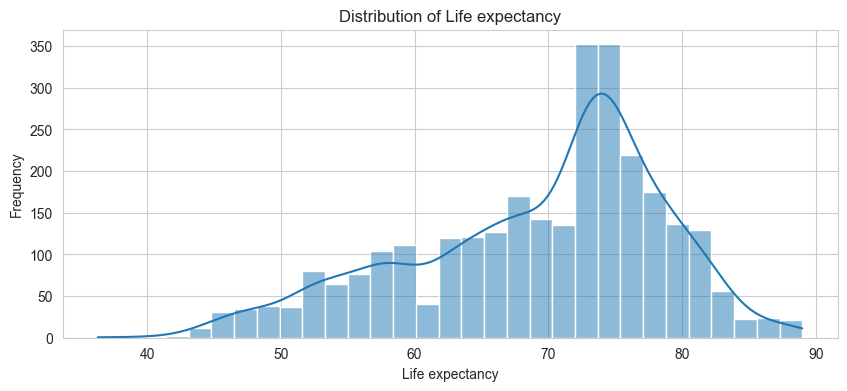

Sample does not normal distributed (reject H0)


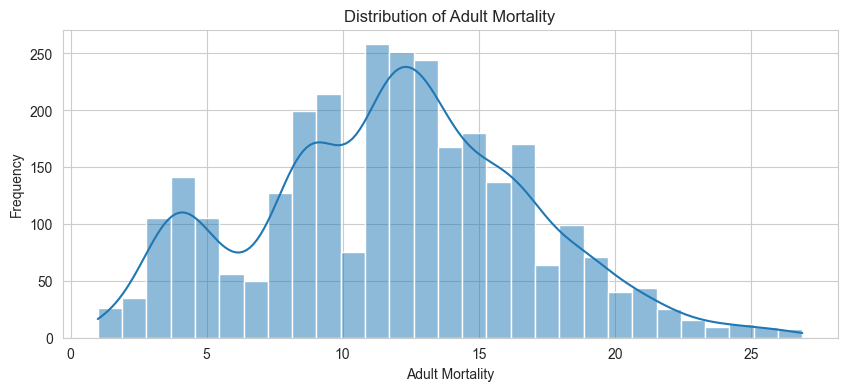

Sample does not normal distributed (reject H0)


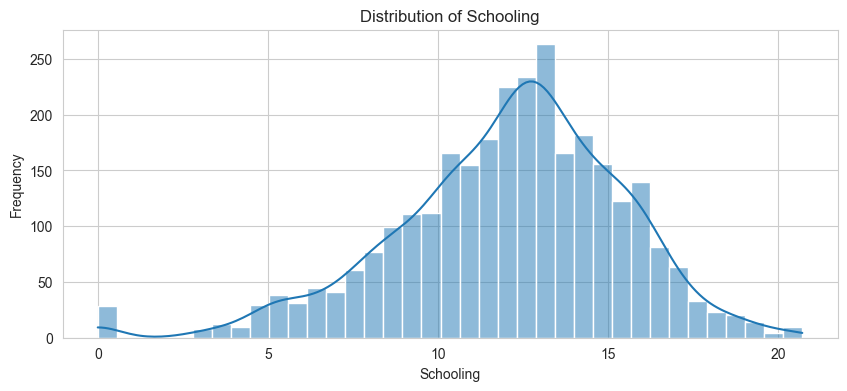

Sample does not normal distributed (reject H0)


In [67]:
# Selecting quantitative variables
quantitative_vars = ['Life expectancy', 'Adult Mortality', 'Schooling']

# Plot histograms and calculate summary statistics for each quantitative variable
for var in quantitative_vars:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_main[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    #normality test
    stat, p = shapiro(df_main[var])
    alpha = 0.05
    if p > alpha:
      print('Sample looks normal distributed (fail to reject H0)')
    else:
      print('Sample does not normal distributed (reject H0)')


# **Bivariate Analysis**
 Using two variables and compare them. This way, we can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. We can also use boxplots.
          

In [68]:
print(df_main.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


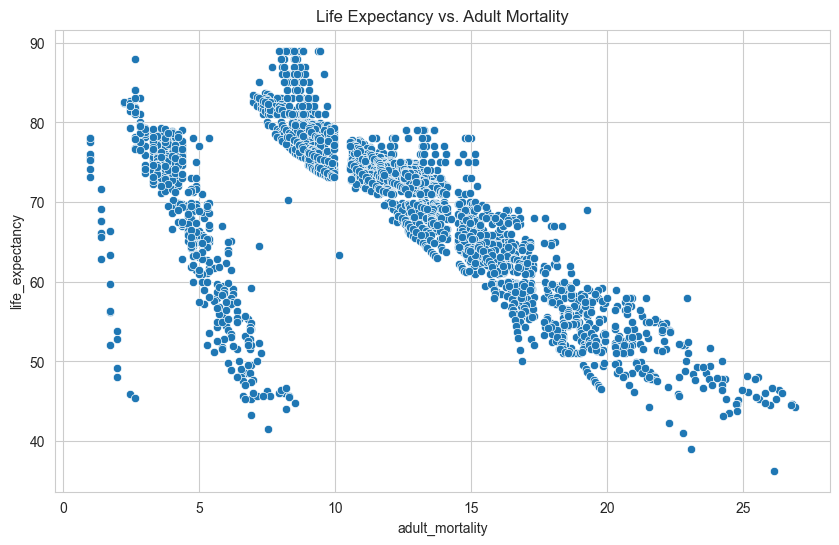

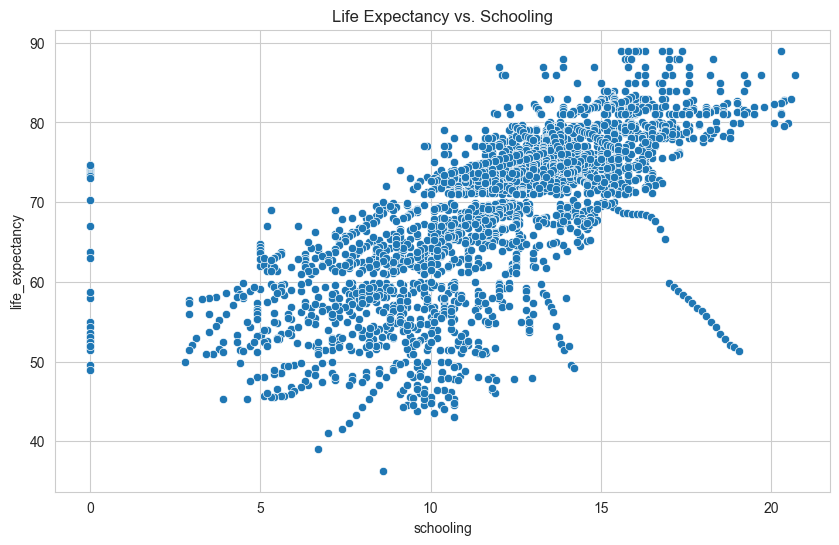

In [69]:
# Remove trailing spaces and standardize capitalization
df_main.columns = df_main.columns.str.strip().str.replace(' ', '_').str.lower()

# Check new column names
print(df_main.columns)

# After renaming, your plot code would look cleaner:
# Scatter plot of Adult Mortality vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='adult_mortality', y='life_expectancy')
plt.title('Life Expectancy vs. Adult Mortality')
plt.show()

# Scatter plot of Infant Deaths vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='schooling', y='life_expectancy')
plt.title('Life Expectancy vs. Schooling')
plt.show()


In [70]:
df_main

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0000,16.2173,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.3914,10.1000
1,Afghanistan,2014,Developing,59.9000,16.4621,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.3893,10.0000
2,Afghanistan,2013,Developing,59.9000,16.3707,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.3853,9.9000
3,Afghanistan,2012,Developing,59.5000,16.4924,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.3805,9.8000
4,Afghanistan,2011,Developing,59.2000,16.5831,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.3743,9.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3000,26.8887,27,4.3600,0.0000,68.0000,31,...,67.0000,7.1300,65.0000,33.6000,454.3667,12777511.0000,9.4000,9.4000,0.3415,9.2000
2934,Zimbabwe,2003,Developing,44.5000,26.7395,26,4.0600,0.0000,7.0000,998,...,7.0000,6.5200,68.0000,36.7000,453.3512,12633897.0000,9.8000,9.9000,0.3492,9.5000
2935,Zimbabwe,2002,Developing,44.8000,8.5440,25,4.4300,0.0000,73.0000,304,...,73.0000,6.5300,71.0000,39.8000,57.3483,125525.0000,1.2000,1.3000,0.3556,10.0000
2936,Zimbabwe,2001,Developing,45.3000,26.1916,25,1.7200,0.0000,76.0000,529,...,76.0000,6.1600,75.0000,42.1000,548.5873,12366165.0000,1.6000,1.7000,0.3556,9.8000


### Check normality

### Correlation matrix

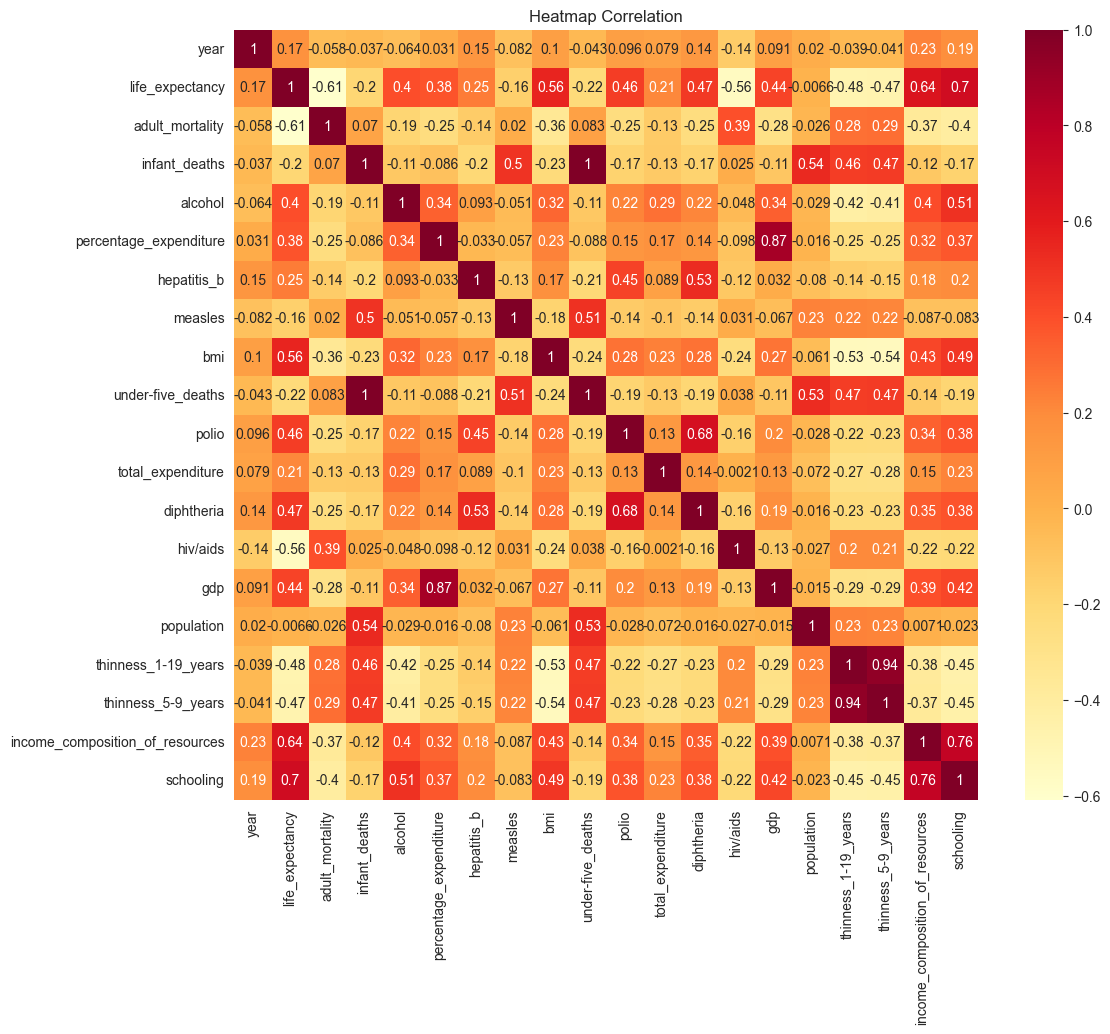

In [71]:
df.copy = df_main
df_qtt = df_main.drop(['country','status'],axis = 1)
# Calculate the correlation matrix
corr_matrix = df_qtt.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Heatmap Correlation')
plt.show()

Base on the heatmap above, we can see that "adult mortality", "income composition of resource" and "schooling" have higher correlation with "life expectancy" than the others. Moreover, three features do not have higher correlation with other features than "life expectancy". Therefore, we can conclude that we do not have multicollinearity and "adult mortality", "income composition of resource" and "schooling" will be selected to build linear regression model.

In [72]:
X1 = df_main['income_composition_of_resources']
X2 = df_main['schooling']
X3 = df_main['adult_mortality']
Y = df_main['life_expectancy']


### Calculate correlation coefficient of three features again.

$ r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $

In [73]:
def correlation_coefficient(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    r = np.sum( A*B) / np.sqrt(np.sum(A**2)*np.sum(B**2))
    return r


In [74]:
print("correlation coefficient of 'income_composition_of_resources':", correlation_coefficient(X1,Y))
print("correlation coefficient of 'schooling':", correlation_coefficient(X2,Y))
print("correlation coefficient of 'adult mortality':", correlation_coefficient(X3,Y))


correlation coefficient of 'income_composition_of_resources': 0.6419410199774896
correlation coefficient of 'schooling': 0.7042942980451877
correlation coefficient of 'adult mortality': -0.6084511956836519


### Perform linear regression

### $ \hat{Y} = Intercept + Slope*X $
$Slope = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}                   $ <br>
$Intercept = \bar{y} - Slope*\bar{x}$               <br>

In [75]:
def linear_regression_line (X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    S = np.sum(A*B) / np.sum(A**2)
    I = Y_mean - S*X_mean
    print(f"linear regression line: Y = {round(I,3)} + {round(S,3)}*X")
    return I,S


In [76]:
I1,S1 = linear_regression_line(X1,Y)
I2,S2 = linear_regression_line(X2,Y)
I3,S3 = linear_regression_line(X3,Y)

linear regression line: Y = 48.635 + 42.715*X
linear regression line: Y = 45.02 + 2.004*X
linear regression line: Y = 82.994 + -1.164*X


In [77]:
Y_predict1 = I1 + S1*X1
Y_predict2 = I2 + S2*X2
Y_predict3 = I3 + S3*X3

residual1 = Y-Y_predict1
residual2 = Y-Y_predict2
residual3 = Y-Y_predict3



<function matplotlib.pyplot.show(close=None, block=None)>

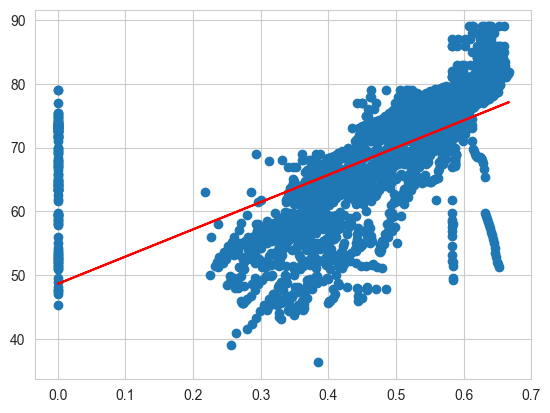

In [78]:
plt.scatter(X1,Y)
plt.plot(X1,Y_predict1,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

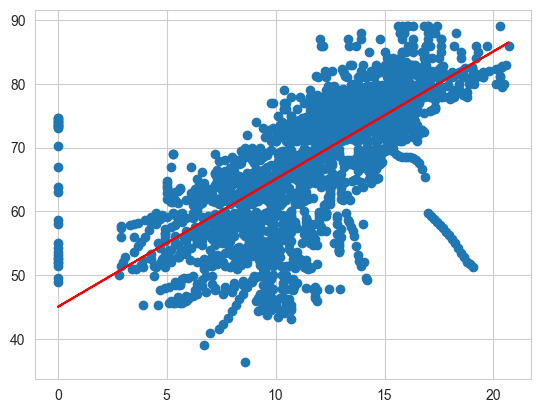

In [79]:
plt.scatter(X2,Y)
plt.plot(X2,Y_predict2,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

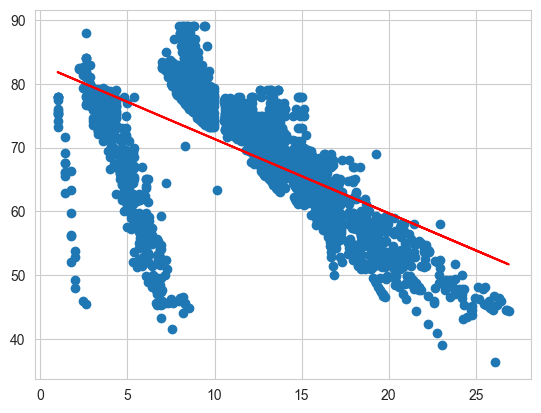

In [80]:
plt.scatter(X3,Y)
plt.plot(X3,Y_predict3,'r')
plt.show

### Check residual assumption

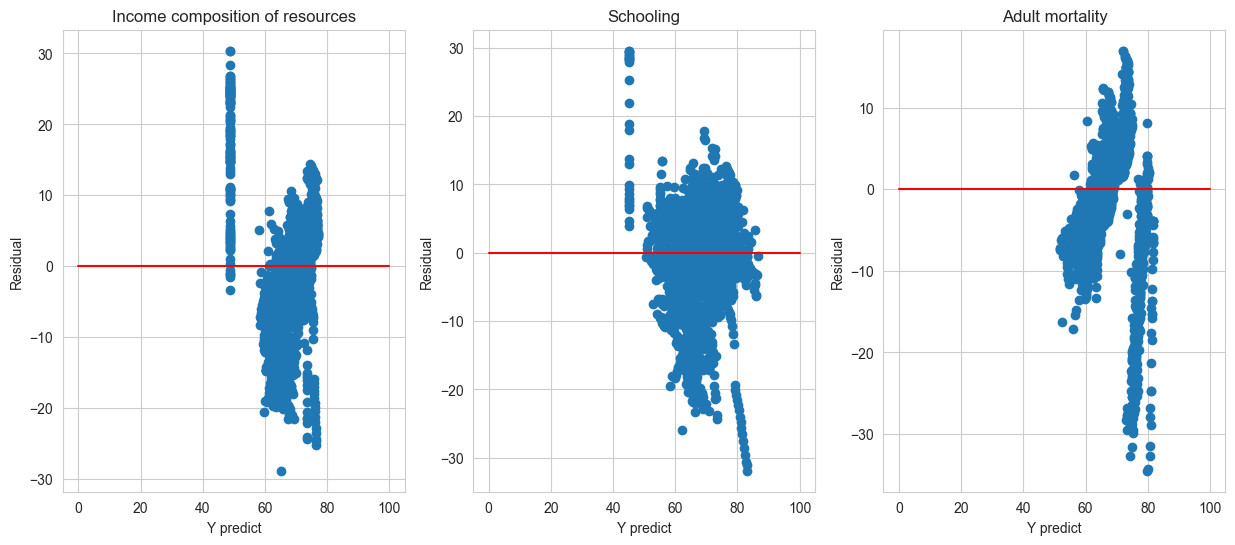

In [81]:
figs,(A,B,C) = plt.subplots(1,3,figsize = (15,6))
A.scatter(Y_predict1,residual1)
A.set_xlabel('Y predict')
A.set_ylabel('Residual')
A.set_title("Income composition of resources")
A.plot([0, 100], [0,0], 'r-')
B.scatter(Y_predict2,residual2)
B.set_xlabel('Y predict')
B.set_ylabel('Residual')
B.set_title("Schooling")
B.plot([0, 100], [0,0], 'r-')
C.scatter(Y_predict3,residual3)
C.set_xlabel('Y predict')
C.set_ylabel('Residual')
C.set_title("Adult mortality")
C.plot([0, 100], [0,0], 'r-')


plt.show()

#### Linear assumption:

Income Composition of Resources:

        The scatter plot of residuals versus the predicted values (Y predict) shows a clear non-linear, curved pattern. The data points do not fall along a straight line, indicating a lack of linearity.

Schooling:

        Similarly, the residual plot for the Schooling data exhibits a distinct non-linear, curved relationship between the residuals and the predicted values (Y predict).

Adult Mortality:

        The residual plot for the Adult Mortality data also displays a curved, non-linear pattern, further confirming the violation of the linearity assumption.

Based on these visual observations, it is clear that the linearity assumption is not met in any of the three datasets. The relationships between the predictor variables and the outcomes appear to be more complex than a simple linear model can capture.

#### Homoscedasticity assumption:

Income composition of resources:
        The residuals plot shows a funnel-shaped pattern, with the spread of the residuals increasing as the fitted values (Y_predict) increase. This suggests a violation of the homoscedasticity assumption, as the variance of the residuals is not constant across the range of fitted values.

    Schooling:
        The residuals plot shows a more random scatter of the residuals around the horizontal line at zero, with a fairly consistent spread across the range of fitted values. This indicates that the homoscedasticity assumption is likely met for this model.

    Adult mortality:
        The residuals plot demonstrates a clear funnel-shaped pattern, with the spread of the residuals increasing as the fitted values (Y_predict) increase. This is a clear indication of heteroscedasticity, and the homoscedasticity assumption is violated for this model.

In summary, the homoscedasticity assumption appears to be violated for the "Income composition of resources" and "Adult mortality" models, while it is likely met for the "Schooling" model. The funnel-shaped patterns in the residuals plots suggest the need to consider using a heteroscedasticity-robust method or transforming the variables to address the issues of non-constant variance in the residuals.


#### Independent assumption:



    Income composition of resources:
        The residuals-vs-order plot shows a somewhat random scatter of the residuals, without any clear patterns or trends. This suggests that the independence assumption is likely met for this model.

    Schooling:
        The residuals-vs-order plot displays a more structured pattern, with the residuals showing a wavy or cyclical trend. This indicates a potential violation of the independence assumption, as the residuals are not randomly distributed.

    Adult mortality:
        The residuals-vs-order plot demonstrates a clear systematic pattern, with the residuals exhibiting a distinct cyclical or wave-like behavior. This is a strong sign that the independence assumption is violated for this model.

### Construct confident interval

### Perform hypothesis testing

### Construct confident interval